In [43]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from  bnse import *
import statsmodels.api as sm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
example = 'hr1'

if example=='hr1':
    signal = np.loadtxt('data/hr2.txt') 
    time = (np.linspace(0, 1800,1800))
    time_label = 'time'
    signal_label = 'heart-rate signal'
elif example == 'hr2':
    signal = np.loadtxt('data/hr1.txt') 
    time = (np.linspace(0, 1800,1800))
    time_label = 'time'
    signal_label = 'heart-rate signal'
elif example == 'sunspots':
    dta = sm.datasets.sunspots.load_pandas().data
    signal = np.array(dta.SUNACTIVITY)
    time = np.array(dta.YEAR)
    time_label = 'time'
    signal_label = 'sunspot data'
        
signal = signal - np.mean(signal)
#can change the number of observations here
#indices = np.random.randint(0, len(time), size=int(len(time))) 
indices = np.random.randint(0, len(time), size=450) 
indices =np.sort(indices)
signal = signal[indices]
time = time[indices]
my_bse = bse(time, signal)
my_bse.set_labels(time_label, signal_label)

if example=='hr1':
    my_bse.set_freqspace(0.03)
elif example == 'hr2':
    my_bse.set_freqspace(0.03)
elif example == 'sunspots':
    my_bse.set_freqspace(0.2)

Negative log likelihood (before training): 976.0577668455056


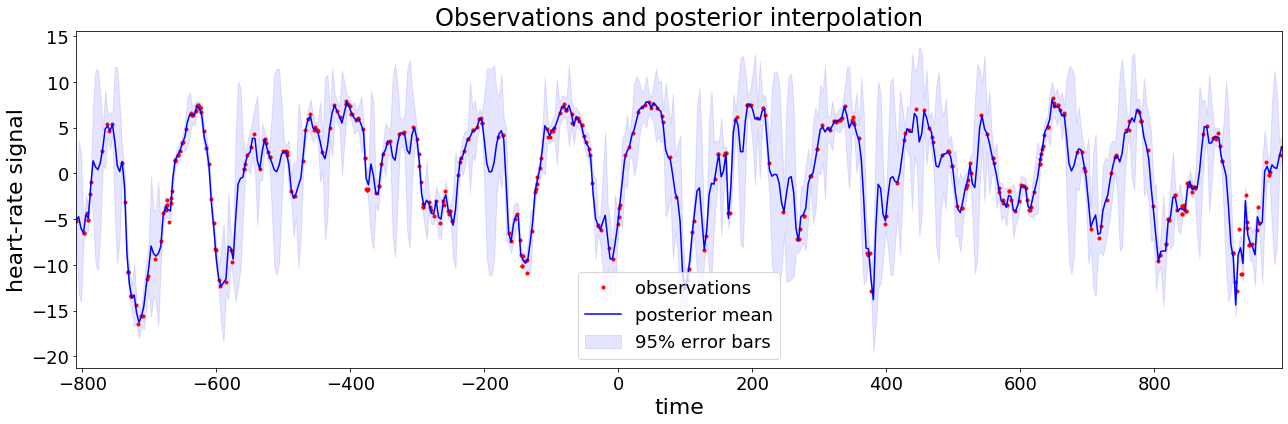

In [45]:
nll = my_bse.neg_log_likelihood()
print(f'Negative log likelihood (before training): {nll}')
my_bse.compute_moments()
my_bse.plot_time_posterior()


In [46]:
print(my_bse.theta)

0.01


In [47]:
%%time 
my_bse.train()


Hyperparameters are:
sigma =4.958696820699232
gamma =0.004962396967114431
theta =0.00023815153579052165
sigma_n =0.7775277126835357
CPU times: user 7.79 s, sys: 34.5 ms, total: 7.83 s
Wall time: 1.96 s


In [48]:
print(my_bse.theta)

0.00023815153579052165


Negative log likelihood (before training): 864.2411952324734


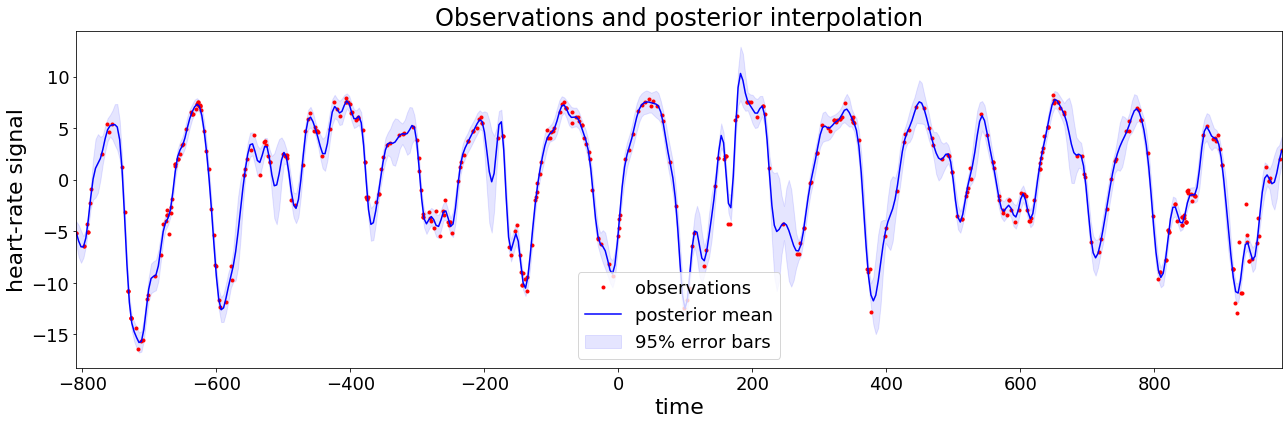

In [49]:
nll = my_bse.neg_log_likelihood()
print(f'Negative log likelihood (before training): {nll}')
my_bse.compute_moments()
my_bse.plot_time_posterior()

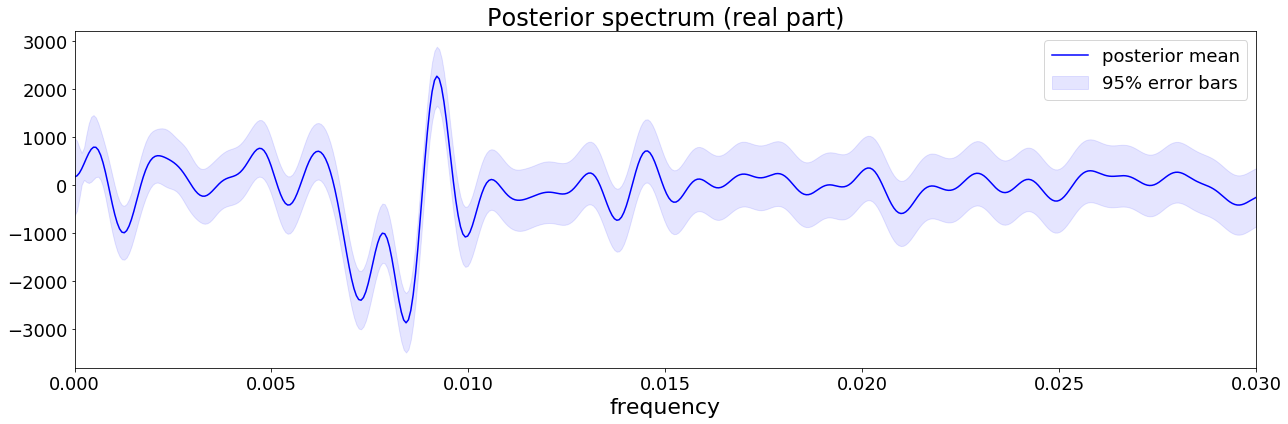

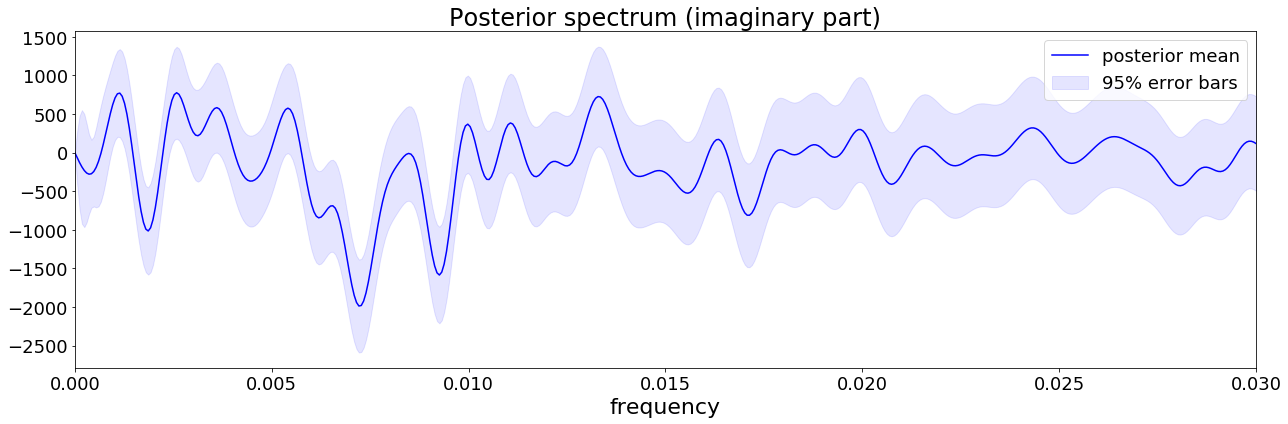

In [50]:
my_bse.plot_freq_posterior()


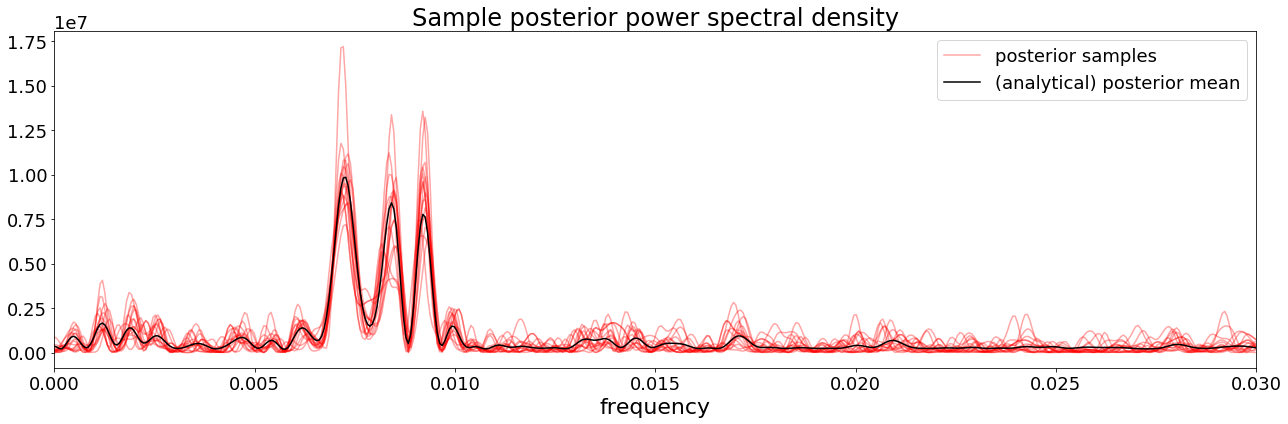

In [51]:
my_bse.plot_power_spectral_density(15)

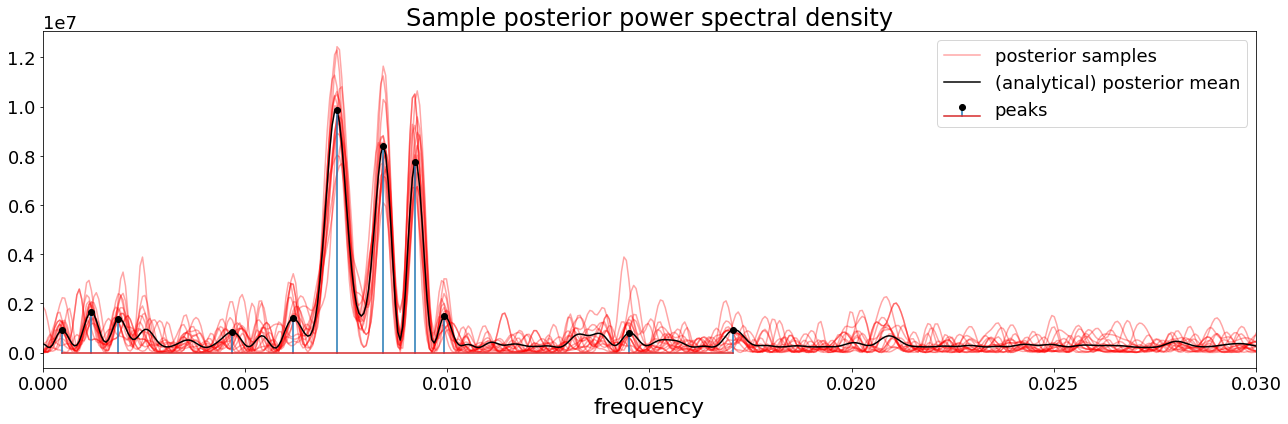

In [53]:
peaks, widths = my_bse.plot_power_spectral_density(15, 'show peaks');


In [78]:
print(f'Peaks are at positions {peaks*(my_bse.w[1]-my_bse.w[0]) }')
print(f'and their widths are {widths[0]*(my_bse.w[1]-my_bse.w[0])}')

Peaks are at positions [0.00048096 0.0012024  0.00186373 0.00468938 0.00619238 0.00727455
 0.00841683 0.0091984  0.00991984 0.01448898 0.01707415]
and their widths are [0.00031545 0.00039567 0.0003597  0.00050419 0.00035745 0.00060008
 0.00042419 0.0004005  0.00031386 0.00041477 0.000531  ]
